In [1]:
#Problem statement is to develop the machine learning approach to predict the engagement score of the video on the user level.
#Step 1: Importing the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
#Step 2: Data Inspection
train = pd.read_csv("C:/Users/DELL-PC/Desktop/Engagement scores/train_0OECtn8.csv")
test = pd.read_csv("C:/Users/DELL-PC/Desktop/Engagement scores/test_1zqHu22.csv")
train.shape,test.shape

((89197, 10), (11121, 9))

In [4]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

row_id              0.0
user_id             0.0
category_id         0.0
video_id            0.0
age                 0.0
gender              0.0
profession          0.0
followers           0.0
views               0.0
engagement_score    0.0
dtype: float64

In [7]:
#selecting categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1]) # Categorical features in train set: 2
#selecting numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64]) # Numerical features in train set: 8
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 2
Numerical Features in Train Set: 8


In [8]:
#Step 3: Data cleaning
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [9]:
#No missing values so we go for next step
#Step 4: Exploratory Data Analysis(EDA)
train.columns


Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [11]:
train.head() #No irregularities in the column

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


<AxesSubplot:xlabel='gender', ylabel='count'>

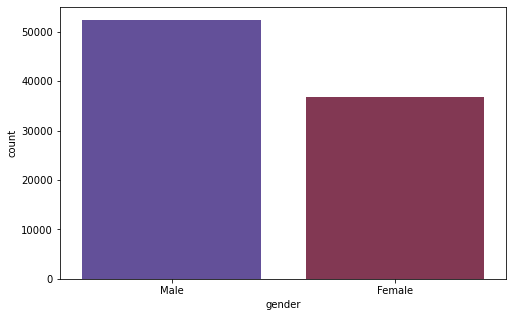

In [12]:
plt.figure(figsize=(8,5))
sns.countplot('gender',data=train,palette='twilight') # Male count is more high in watching videos

<AxesSubplot:xlabel='profession', ylabel='count'>

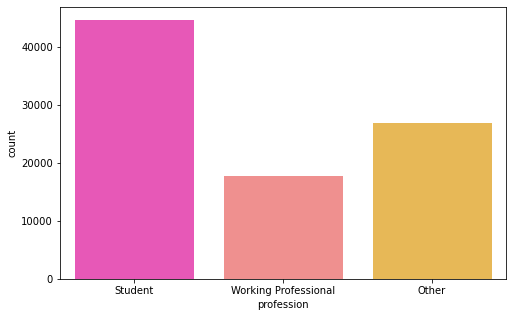

In [13]:
plt.figure(figsize=(8,5))
sns.countplot('profession',data=train,palette='spring') # Student count is high in watching the videos


<AxesSubplot:xlabel='engagement_score', ylabel='gender'>

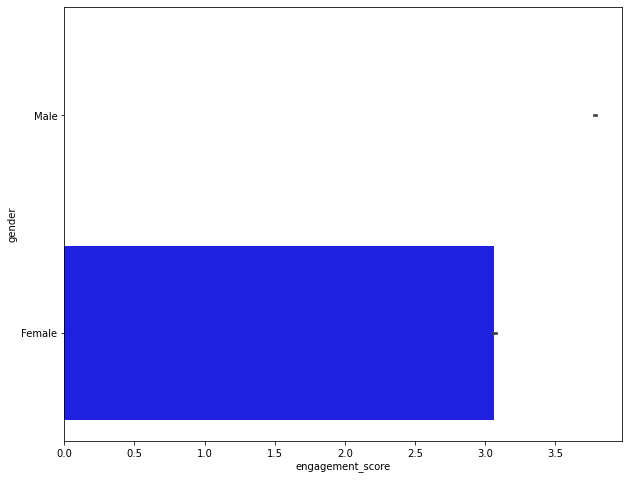

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(y='gender',x='engagement_score',data=train,palette='flag')

<AxesSubplot:xlabel='engagement_score', ylabel='profession'>

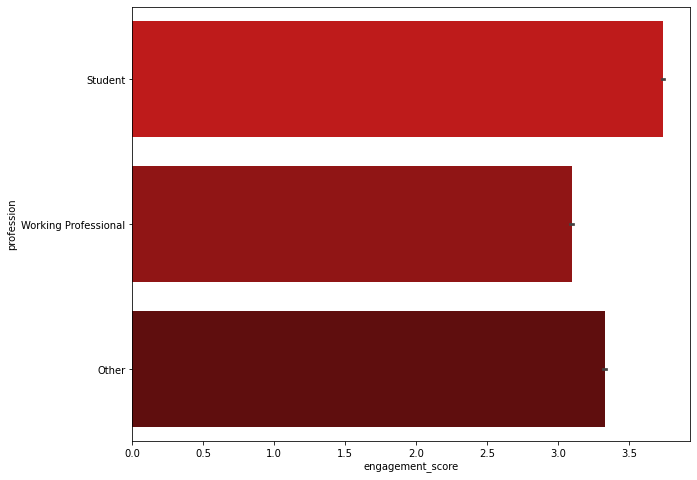

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(y='profession',x='engagement_score',data=train,palette='flag') # Student profession having more engagement score

In [16]:
#Step 5: Building Model
train.head()


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [17]:
#LabelEncoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
for i in var_mod:
    test[i] = le.fit_transform(test[i]) #Encoding the required columns from training and test dataset

In [18]:
train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [19]:
# Separate features and target
X= train.drop(columns = ['engagement_score'], axis=1)
y= train['engagement_score']

In [20]:
# 40% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4,random_state=22)

In [21]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()

<AxesSubplot:>

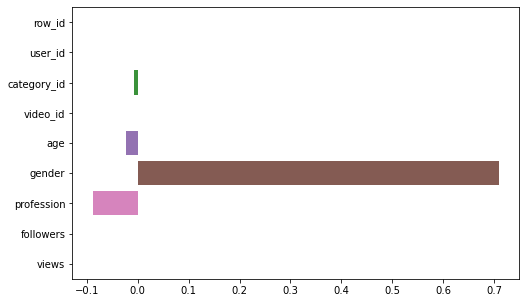

In [22]:
#Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

In [24]:
#Gender, profession, age are the most important attributes to determine engagement_score
#RMSE (Root Mean Squared Error)
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse) #Validation Set RMSE score is around 75 from this linear model


Root Mean Squared Error: 0.7523657330835262


In [26]:
submission = pd.read_csv('C:/Users/DELL-PC/Desktop/Engagement scores/sample_submission_JPlpRcN.csv')
final_predictions = LR.predict(test)
submission['engagement_score'] = final_predictions
#only positive predictions for the target variable
submission['engagement_score'] = submission['engagement_score'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('C:/Users/DELL-PC/Desktop/Engagement scores/my_submission.csv', index=False)